In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
print(os.getcwd())
data_raw = pd.read_csv(r'data\Project_Data_EE4C12_S&S_EMG.csv')
data_raw.head()

c:\Users\blacksilver\Desktop\MLEE_EMG


,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [12]:
def data_normalize(data):
    data_norm = data - np.mean(data)
    data_norm = data_norm / np.std(data_norm)
    return data_norm

In [13]:
data_copy = data_raw.copy()
for col in data_raw.columns[1:9]:
    data_copy[col]=data_normalize(data_raw[col])

In [14]:
# data_copy = data_raw.copy()
data_classes = []
n_classes = data_copy['class'].max()+1
for class_ in range(n_classes):
    data_classes.append(data_copy[data_copy['class'] == class_])

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


def Classifier(clf,X_input,Y_input, normlize = 'false'):
    X_train, X_val, y_train, y_val = train_test_split(X_input, Y_input, test_size=0.25, random_state=472000000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    y_pred_train = clf.predict(X_train)
    
    # plot confusion matrix
    
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, normalize='true')
    ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true')

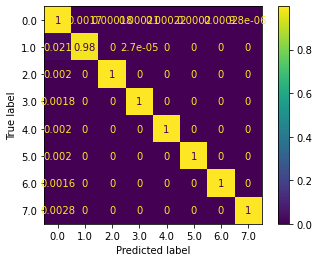

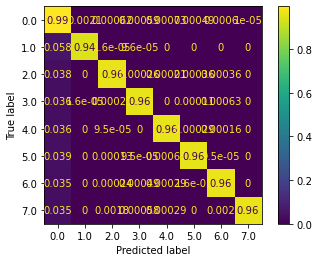

In [23]:
from sklearn.ensemble import RandomForestClassifier

data_all=np.concatenate((data_classes), axis=0)
data_signal = data_all[:,1:9]


# gradient boost random forest
# clf_GBC = GradientBoostingClassifier()
clf_RFC = RandomForestClassifier(n_jobs=-1, bootstrap = True)
# clf_xgb = XGBClassifier()
Classifier(clf_RFC,data_signal,data_all[:,9])

In [27]:
aaa=(1,2,3)
aaa[1:2]

(2,)

In [25]:
(1)

1

In [28]:
(1,)

(1,)